# Python Data Science Handbook
## By Jake VenderPlas

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser
from pandas_datareader import data

### pandas series objects

In [25]:
data=pd.Series([0.25,0.5,0.75,1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [8]:
data=pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
data

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [9]:
data['b']

2

In [10]:
data=pd.Series([1,2,3,4,5], index=['2','5','3','4','1'])
data

2    1
5    2
3    3
4    4
1    5
dtype: int64

In [12]:
data['5']

2

In [13]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [15]:
population['California']

38332521

In [16]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [19]:
pd.Series([2,4,6])

0    2
1    4
2    6
dtype: int64

In [20]:
pd.Series(5, index=[1,3,5])

1    5
3    5
5    5
dtype: int64

In [23]:
pd.Series({2:'a', 4:'b',6:'c'})

2    a
4    b
6    c
dtype: object

In [24]:
pd.Series({2:'a', 4:'b',6:'c'}, index=[2,6])

2    a
6    c
dtype: object

### Pandas DataFrame Object

In [28]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}

In [29]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [44]:
states=pd.DataFrame({'population':population,'area':area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [32]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [33]:
states.columns

Index(['population', 'area'], dtype='object')

In [35]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [36]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [42]:
data=[{'a':i, 'b':2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [43]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [45]:
states=pd.DataFrame({'population':population,'area':area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [46]:
pd.DataFrame(np.random.rand(3,2), columns=['first','second'], index=['a','b','c'])

,first,second
a,0.720192,0.542565
b,0.092206,0.499136
c,0.897360,0.267247


In [47]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [48]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### Pandas index objects

In [52]:
ind=pd.Index([2,4,7,9])
ind

Int64Index([2, 4, 7, 9], dtype='int64')

In [53]:
ind[::2]

Int64Index([2, 7], dtype='int64')

#### pandas index is immutable

In [55]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([1, 7, 5, 3, 9])

In [59]:
indA & indB # insertion

Int64Index([1, 3, 5, 7, 9], dtype='int64')

In [60]:
indA | indB # union

Int64Index([1, 3, 5, 7, 9], dtype='int64')

In [61]:
indA ^ indB # symmetric difference

Int64Index([], dtype='int64')

## Data Indexing and Selection

In [64]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [65]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [66]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [68]:
data['e']=1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [69]:
data[(data>0.25) & (data<1.25)]

b    0.50
c    0.75
d    1.00
dtype: float64

In [70]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [71]:
data[1:3]

3    b
5    c
dtype: object

In [73]:
data.loc[1] # loc allows indexing and slicing

'a'

In [74]:
data.iloc[1] # iloc allows indexing and slicing it always references the implicit python style indicex

'b'

In [75]:
data.iloc[1:3]

3    b
5    c
dtype: object

### Data Selection in DataFrame

In [3]:
area = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 'Florida': 170312,'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127, 'Florida': 19552860,'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [4]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [5]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [6]:
data.area is data['area']

True

In [8]:
data['density']=data['pop']/data['area']

In [9]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [10]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [11]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [12]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [13]:
data.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [16]:
data.loc[:'Illinois', :'pop'] 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [20]:
data.loc[data.density>100, ['pop','density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [22]:
data.iloc[0,2]=90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [23]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [24]:
data[data.density>100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Operating on Data in Pandas

In [26]:
rng=np.random.RandomState(42)
ser=pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [27]:
df=pd.DataFrame(rng.randint(0,10,(3,4)), columns=['A','B','C','D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [29]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [30]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [31]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [33]:
pop

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [34]:
area/pop

California    0.011060
Texas         0.026303
New York      0.007190
Florida       0.008710
Illinois      0.011644
dtype: float64

In [36]:
area.index | pop.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [37]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [38]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [39]:
A=pd.DataFrame(rng.randint(0,20,(2,2)), columns=list('AB'))

In [40]:
B=pd.DataFrame(rng.randint(0,10,(3,3)), columns=list('BAC'))

In [43]:
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [45]:
fill=A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


## Operations Between DataFrame and Series

In [4]:
rng=np.random.RandomState(42)
A=rng.randint(10, size=(3,4))
A

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [5]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 0,  6, -5,  2],
       [ 1,  1, -4,  3]])

In [6]:
df=pd.DataFrame(A, columns=list('QRST'))

In [7]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,6,-5,2
2,1,1,-4,3


In [8]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,4,1
1,-3,0,-7,-3
2,3,0,-1,3


In [9]:
halfrow=df.iloc[0, ::2]
halfrow

Q    6
S    7
Name: 0, dtype: int32

In [12]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,0.0,NaN,-5.0,NaN
2,1.0,NaN,-4.0,NaN


## Handling Missing Data

In [16]:
vals1=np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [17]:
# The other missing data representation, NaN (acronym for Not a Number), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [18]:
1+np.nan

nan

In [19]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

## NaN and None in Pandas

In [21]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [22]:
x= pd.Series(range(2), dtype=int)

In [24]:
x[0]=None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

In [ ]:
"""
isnull()
Generate a Boolean mask indicating missing values
notnull()
Opposite of isnull()
dropna()
Return a filtered version of the data
fillna()
Return a copy of the data with missing values filled or imputed
"""

In [27]:
data=pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [28]:
data[data.notnull()]

0        1
2    hello
dtype: object

## Dropping null values

In [30]:
data.dropna()

0        1
2    hello
dtype: object

In [31]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [32]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [33]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [35]:
df[3]=np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [37]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [38]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [40]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [41]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [43]:
data.fillna(method='ffill') # forward fill

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [44]:
data.fillna(method='bfill')  # backword filling

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [45]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [46]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

In [3]:
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]

In [4]:
pop=pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [11]:
pop[('California', 2010): ('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [8]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [12]:
index= pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [13]:
pop=pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [12]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [14]:
pop_df=pop.unstack() #The unstack() method will quickly convert a multiplyindexed Series into a conventionally indexed DataFrame:
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [14]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [15]:
pop_df = pd.DataFrame({'total': pop,'under18': [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [16]:
f_u18=pop_df['under18']/pop_df['total']
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [17]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

In [15]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])

df

data1     data2
a 1  0.613685  0.880342
  2  0.223576  0.878373
b 1  0.178825  0.130968
  2  0.743174  0.369595

In [16]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}

In [21]:
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [22]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [23]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [24]:
pd.MultiIndex.from_product([['a','b'], [1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [29]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [17]:
    pop.index.name=['state', 'year']
    pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## MultiIndex for columns  **

In [18]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

In [19]:
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [20]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      19.0  37.7  35.0  37.6  27.0  36.5
     2      17.0  37.8  24.0  35.8  50.0  36.2
2014 1      31.0  36.9  25.0  38.0  46.0  38.1
     2      39.0  38.5  42.0  36.0  28.0  37.5

In [35]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      33.0  37.7
     2      27.0  38.2
2014 1      31.0  35.3
     2      43.0  35.5

## Indexing and Slicing a MultiIndex

In [5]:
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [21]:
pop['California', 2000]

33871648

In [22]:
pop.loc['California':'New York']

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [23]:
pop[:,2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [25]:
pop[['California', 'Texas']]

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [26]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      19.0  37.7  35.0  37.6  27.0  36.5
     2      17.0  37.8  24.0  35.8  50.0  36.2
2014 1      31.0  36.9  25.0  38.0  46.0  38.1
     2      39.0  38.5  42.0  36.0  28.0  37.5

In [27]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      19.0  37.7
     2      17.0  37.8

In [29]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        19.0
      2        17.0
2014  1        31.0
      2        39.0
Name: (Bob, HR), dtype: float64

In [30]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,19.0,35.0,27.0
2014,1,31.0,25.0,46.0


## Rearranging Multi-Indices

In [32]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.420358
      2      0.088513
c     1      0.561652
      2      0.867200
b     1      0.809525
      2      0.914901
dtype: float64

In [33]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [35]:
data=data.sort_index()
data

char  int
a     1      0.420358
      2      0.088513
b     1      0.809525
      2      0.914901
c     1      0.561652
      2      0.867200
dtype: float64

In [37]:
data['a':'b']

char  int
a     1      0.420358
      2      0.088513
b     1      0.809525
      2      0.914901
dtype: float64

In [39]:
pop.unstack(level=0)   #column level

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [40]:
pop.unstack(level=1)   #row level

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [41]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [42]:
pop_flat= pop.reset_index(name='populations')
pop_flat

,level_0,level_1,populations
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


## Data Aggregations on Multi-Indices

In [46]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      19.0  37.7  35.0  37.6  27.0  36.5
     2      17.0  37.8  24.0  35.8  50.0  36.2
2014 1      31.0  36.9  25.0  38.0  46.0  38.1
     2      39.0  38.5  42.0  36.0  28.0  37.5

In [47]:
data_mean=health_data.mean(level='year')
data_mean

subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     18.0  37.75  29.5  36.7  38.5  36.35
2014     35.0  37.70  33.5  37.0  37.0  37.80

In [49]:
data_mean.mean(axis=1, level='type')   # level 1 is for row wise operation

type,HR,Temp
year,,
2013,28.666667,36.933333
2014,35.166667,37.500000


## Combining Datasets: Concat and Append

In [12]:
def make_def(col,ind):
    data={c: [str(c)+str(i) for i in ind] for c in col}
    return pd.DataFrame(data,ind)
make_def('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## Recall: Concatenation of NumPy Arrays

In [17]:
x=[i for i in range(3)]
y=[i for i in range(3,6)]
z=[i for i in range(6,9)]

In [19]:
np.concatenate([x,y,z])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
x = [[1, 2], [3, 4]]
np.concatenate([x,x], axis=1) # 1 for column wise concatenation 

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Pandas pd.concat()

In [26]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [27]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [39]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1)) # 1 for row wise concatenation

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


### Duplicate indices

In [44]:
x=make_df('AB', [0,1])
y=make_df('CD', [2,3])

In [52]:
print(x), print(y), print(pd.concat([x,y]))

    A   B
0  A0  B0
1  A1  B1
    C   D
2  C2  D2
3  C3  D3
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
2  NaN  NaN   C2   D2
3  NaN  NaN   C3   D3


C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(None, None, None)

In [58]:
try:
    pd.concat([x,y], verify_integrity=True, sort=True)
except ValueError as e:
    print("ValueError:", e)

In [61]:
pd.concat([x,y], ignore_index=True, sort=True)

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


In [65]:
pd.concat([x,y], keys=['x', 'y'], sort=True) # adding multi-index keys

A    B    C    D
x 0   A0   B0  NaN  NaN
  1   A1   B1  NaN  NaN
y 2  NaN  NaN   C2   D2
  3  NaN  NaN   C3   D3

## concatenation of pandas dataframe with join

In [69]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
pd.concat([df5,df6])

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [70]:
pd.concat([df5,df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [71]:
pd.concat([df5,df6], join_axes=[df5.columns])

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [73]:
df5.append(df6)   # join by appending

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


## Combining Datasets: Merge and Join

### One-to-one joins

In [77]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 'hire_date': [2004, 2008, 2012, 2014]})

In [79]:
df3=pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one joins

In [81]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


### Many-to-many joins

In [85]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'], 'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


### Specification of the Merge Key

In [87]:
pd.merge(df1,df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [88]:
pd.merge(df1,df3)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [101]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [102]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})

In [100]:
pd.merge(df1,df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [104]:
pd.merge(df1,df3, left_on="employee", right_on="name").drop('name', axis=1) # drop name in row wise 

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [106]:
df1a=df1.set_index('employee')
df2a=df2.set_index('employee')
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [110]:
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [108]:
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


## Specifying Set Arithmetic for Joins

In [114]:
df6=pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7=pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']}, columns=['name', 'drink'])

In [115]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [116]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [117]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [118]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


## Overlapping Column Names: The suffixes Keyword

In [120]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})

In [121]:
pd.merge(df8, df9, on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [122]:
pd.merge(df8, df9, on='name', suffixes=['_L','_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [134]:
pop=pd.read_csv('data/state-population.csv')
areas=pd.read_csv('data/state-areas.csv')
abbrevs=pd.read_csv('data/state-abbrevs.csv')

In [135]:
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [140]:
merged=pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [141]:
merged=merged.drop('abbreviation', 1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [142]:
print(merged.isnull().any())

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool


In [144]:
merged[merged['population'].isnull()].head() # find out null from the population field 

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [145]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [146]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [147]:
final=pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [149]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [150]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [151]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [157]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [158]:
data2010.set_index('state', inplace=True)
density=data2010['population']/data2010['area (sq. mi)']

In [160]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [161]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

In [13]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [165]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Simple Aggregation in Pandas

In [6]:
rng=np.random.RandomState(42)
ser=pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [7]:
ser.sum()

2.811925491708157

In [8]:
ser.mean()

0.5623850983416314

In [9]:
df=pd.DataFrame({'A':rng.rand(5), 'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [10]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [12]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [14]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply, Combine

In [16]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])

In [17]:
df.groupby('key')

In [18]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [19]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [21]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [29]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

### Aggregate, filter, transform, apply

In [33]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data1': range(6), 'data2': rng.randint(0, 10, 6)}, columns = ['key', 'data1', 'data2'])

In [34]:
df

,key,data1,data2
0,A,0,4
1,B,1,0
2,C,2,9
3,A,3,5
4,B,4,8
5,C,5,0


In [35]:
df.groupby('key').aggregate(['min', np.median, 'max']) # use of aggregate funciton in a data frame

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4    4.5   5
B       1    2.5   4     0    4.0   8
C       2    3.5   5     0    4.5   9

In [36]:
df.groupby('key').aggregate({'data1':'min', 'data2':'max'}) # use of aggregate funciton in a data frame

,data1,data2
key,,
A,0,5
B,1,8
C,2,9


In [37]:
def filter_func(x):
    return x['data2'].std()>4
df.groupby('key').filter(filter_func)   # use of filter with a funciton after applying groupby function. 

,key,data1,data2
1,B,1,0
2,C,2,9
4,B,4,8
5,C,5,0


In [39]:
df.groupby('key').transform(lambda x: x-x.mean())  # apply of transform method

,data1,data2
0,-1.5,-0.5
1,-1.5,-4.0
2,-1.5,4.5
3,1.5,0.5
4,1.5,4.0
5,1.5,-4.5


In [41]:
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,4
1,B,0.125000,0
2,C,0.222222,9
3,A,0.333333,5
4,B,0.500000,8
5,C,0.555556,0


In [42]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,13
1,4,5
2,4,8


In [43]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,9
B,5,8
C,7,9


In [45]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,17
vowel,3,9


In [46]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.5
b,consonant,2.5,4.0
c,consonant,3.5,4.5


In [47]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Motivating Pivot Tables

In [6]:
titatic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [8]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot table by syntax

In [10]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [14]:
age = pd.cut(titanic['age'], [0, 18, 80]) #data in range 0-18 and 18-80
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [15]:
fare=pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [16]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [17]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True) # margins for average of total computing. 

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Birthrate Data

In [22]:
births=pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [23]:
births['decade']= 10*(births['year']//10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


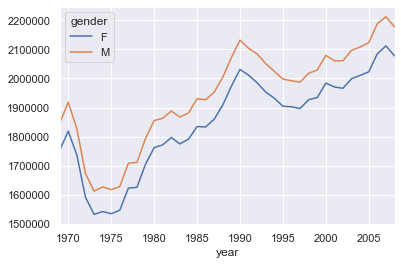

In [24]:
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

In [25]:
quartiles=np.percentile(births['births'],[25,50,75])     # this operations for data cleaning and outlyers removal
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])

In [26]:
births=births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [27]:
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [29]:
births['day'] = births['day'].astype(int)
births

C:\Users\MondalPa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [30]:
# create a datetime index
births.index=pd.to_datetime(10000*births.year + 100*births.month + births.day, format= '%Y%m%d')
births['dayofweek']= births.index.dayofweek

Text(0, 0.5, 'mean births by day')

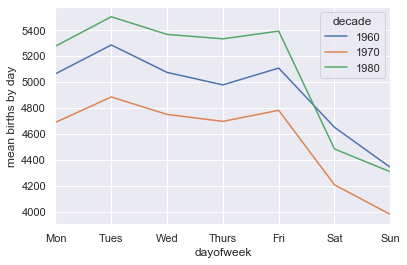

In [35]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [37]:
birth_by_date=births.pivot_table('births', [births.index.month, births.index.day])
birth_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

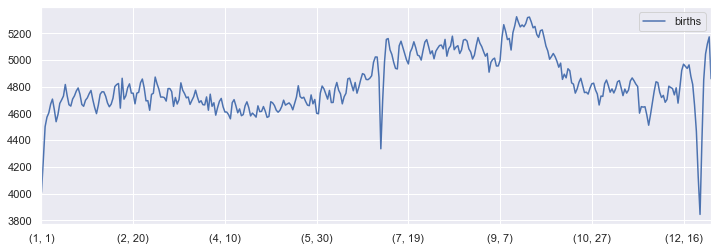

In [43]:
fig,ax=plt.subplots(figsize=(12,4))
birth_by_date.plot(ax=ax)

## Vectorized String Operations 

In [2]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [3]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [7]:
data = ['peter', 'Paul',None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [8]:
name=pd.Series(data)
name

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [9]:
name.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## Tables of Pandas String Methods

In [ ]:
len() lower() translate() islower()
ljust() upper() startswith() isupper()
rjust() find() endswith() isnumeric()
center() rfind() isalnum() isdecimal()
zfill() index() isalpha() split()
strip() rindex() isdigit() rsplit()
rstrip() capitalize() isspace() partition()
lstrip() swapcase() istitle() rpartition()

In [12]:
name.str.lower()

0    peter
1     paul
2     None
3     mary
4    guido
dtype: object

In [13]:
name.str.len()

0    5.0
1    4.0
2    NaN
3    4.0
4    5.0
dtype: float64

In [14]:
name.str.startswith('M')

0    False
1    False
2     None
3     True
4    False
dtype: object

### Methods using regular expressions

In [ ]:
Method Description
match() Call re.match() on each element, returning a Boolean.
extract() Call re.match() on each element, returning matched groups as strings.
findall() Call re.findall() on each element.
replace() Replace occurrences of pattern with some other string.
contains() Call re.search() on each element, returning a Boolean.
count() Count occurrences of pattern.
split() Equivalent to str.split(), but accepts regexps.
rsplit() Equivalent to str.rsplit(), but accepts regexps.

In [17]:
name.str.extract('([A-Za-z]+)')

,0
0,peter
1,Paul
2,NaN
3,MARY
4,gUIDO


In [19]:
name.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [peter]
1     [Paul]
2       None
3     [MARY]
4    [gUIDO]
dtype: object

In [ ]:
Pandas string method
-------------------------------
Method Description
get() Index each element
slice() Slice each element
slice_replace() Replace slice in each element with passed value
cat() Concatenate strings
repeat() Repeat values
normalize() Return Unicode form of string
pad() Add whitespace to left, right, or both sides of strings
wrap() Split long strings into lines with length less than a given width
join() Join strings in each element of the Series with passed separator
get_dummies() Extract dummy variables as a DataFrame

In [20]:
name.str[0:3]

0     pet
1     Pau
2    None
3     MAR
4     gUI
dtype: object

In [21]:
name.str.split().str.get(-1)

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [26]:
full_name = pd.DataFrame({'name': name,'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C|D']})
full_name

,name,info
0,peter,B|C|D
1,Paul,B|D
2,None,A|C
3,MARY,B|D
4,gUIDO,B|C|D


In [28]:
full_name['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,1


### Working with Time Series

In [65]:
datetime(year=2020, month=5, day=28)

datetime.datetime(2020, 5, 28, 0, 0)

In [67]:
date=parser.parse("28th of May, 2020")
date

datetime.datetime(2020, 5, 28, 0, 0)

In [68]:
date.strftime("%A")   # day of week

'Thursday'

In [70]:
date=np.array('2020-05-28', dtype=np.datetime64) # this is the datetime type in numpy  (datetime64)
date

array('2020-05-28', dtype='datetime64[D]')

In [71]:
date + np.arange(12)

array(['2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
       '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08'],
      dtype='datetime64[D]')

In [72]:
np.datetime64("2020-05-28")

numpy.datetime64('2020-05-28')

In [73]:
np.datetime64("2020-05-28 12:00")

numpy.datetime64('2020-05-28T12:00')

In [74]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [ ]:
Code Meaning Time span (relative) Time span (absolute)
Y Year ± 9.2e18 years [9.2e18 BC, 9.2e18 AD]
M Month ± 7.6e17 years [7.6e17 BC, 7.6e17 AD]
W Week ± 1.7e17 years [1.7e17 BC, 1.7e17 AD]
D Day ± 2.5e16 years [2.5e16 BC, 2.5e16 AD]
h Hour ± 1.0e15 years [1.0e15 BC, 1.0e15 AD]
m Minute ± 1.7e13 years [1.7e13 BC, 1.7e13 AD]
s Second ± 2.9e12 years [ 2.9e9 BC, 2.9e9 AD]
ms Millisecond ± 2.9e9 years [ 2.9e6 BC, 2.9e6 AD]
us Microsecond ± 2.9e6 years [290301 BC, 294241 AD]
ns Nanosecond ± 292 years [ 1678 AD, 2262 AD]
ps Picosecond ± 106 days [ 1969 AD, 1970 AD]
fs Femtosecond ± 2.6 hours [ 1969 AD, 1970 AD]
as Attosecond ± 9.2 seconds [ 1969 AD, 1970 AD]

### Dates and times in Pandas: Best of both worlds

In [2]:
date=pd.to_datetime('30 05 2020')
date.strftime('%A')

'Saturday'

In [3]:
date+pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [5]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [6]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [10]:
dates=pd.to_datetime([datetime(2020, 5, 31), '30th of May 2020', '29-05-2020', '20200528'])
dates

DatetimeIndex(['2020-05-31', '2020-05-30', '2020-05-29', '2020-05-28'], dtype='datetime64[ns]', freq=None)

In [11]:
dates.to_period('D')

PeriodIndex(['2020-05-31', '2020-05-30', '2020-05-29', '2020-05-28'], dtype='period[D]', freq='D')

In [12]:
dates - dates[0]

TimedeltaIndex(['0 days', '-1 days', '-2 days', '-3 days'], dtype='timedelta64[ns]', freq=None)

In [13]:
pd.date_range('31th of May 2020', '15-06-2020')

DatetimeIndex(['2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range('20200531', periods=10)

DatetimeIndex(['2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-06-09'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range('20200531', periods=10, freq='M')

DatetimeIndex(['2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28'],
              dtype='datetime64[ns]', freq='M')

In [19]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

In [ ]:
Code Description Code Description
D Calendar day B Business day
W Weekly
M Month end BM Business month end
Q Quarter end BQ Business quarter end
A Year end BA Business year end
H Hours BH Business hours
T Minutes
S Seconds
L Milliseonds
U Microseconds
N Nanoseconds

In [21]:
pd.timedelta_range(0, periods=10, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00', '22:30:00'],
               dtype='timedelta64[ns]', freq='150T')

## Resampling, Shifting, and Windowing

In [45]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2015', end='2020', data_source='yahoo')
goog

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,531.141724,524.360352,529.795471,524.958740,1368200.0,524.958740
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447500.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059800.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899900.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065000.0,499.727997
...,...,...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,1351.890015


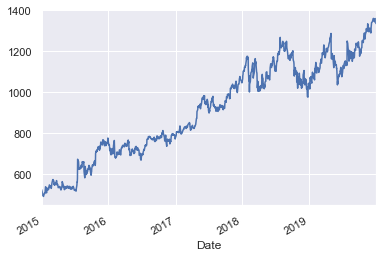

In [46]:
goog = goog['Close']
goog.plot();


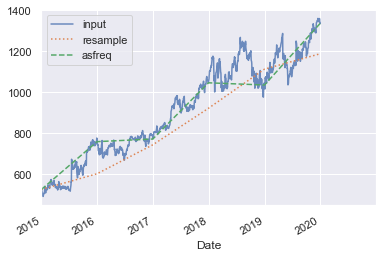

In [54]:
goog.plot(alpha=0.8, style='-')
goog.resample('BA').mean().plot(style=':')  # resample the data in BA: Business year end for data aggregation
goog.asfreq('BA').plot(style='--')   ## data selection
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

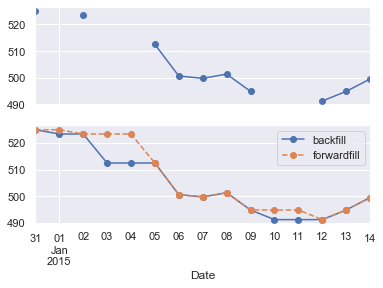

In [56]:
fig, ax = plt.subplots(2, sharex=True) # sharing the properties along x axis
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method= 'bfill').plot(ax=ax[1], style= '-o')
data.asfreq('D', method= 'ffill').plot(ax=ax[1], style= '--o')
ax[1].legend(['backfill', 'forwardfill'])

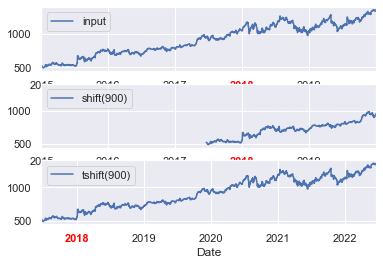

In [69]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)   # shift() shifts the data,
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)  # tshift() shifts the index
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');


In [ ]:
## We see here that shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while tshift(900) shifts the index values by 900 days.

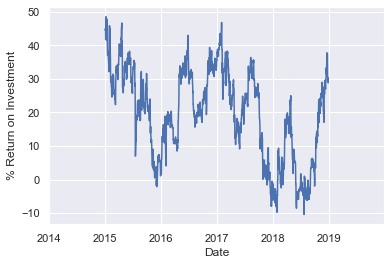

In [70]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

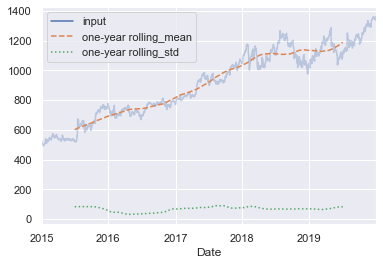

In [73]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Example: Visualizing Seattle Bicycle Counts

In [85]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [86]:
data.columns=['West', 'East']
data['Total']= data.eval('East + West')
data.dropna().describe()

,West,East,Total
count,26225.000000,26225.000000,26225.000000
mean,58.310658,53.605682,111.916339
std,75.671427,76.128342,137.383976
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,17.000000
50%,33.000000,28.000000,64.000000
75%,77.000000,67.000000,149.000000
max,781.000000,667.000000,1050.000000


Text(0, 0.5, 'Hourly bicycle count')

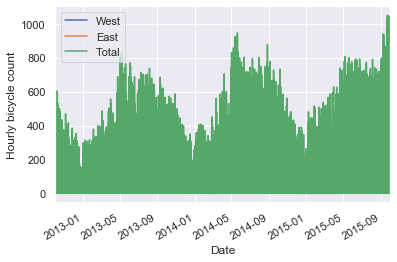

In [89]:
data.plot()
plt.ylabel('Hourly bicycle count')

Text(0, 0.5, 'Weekly bicycle count')

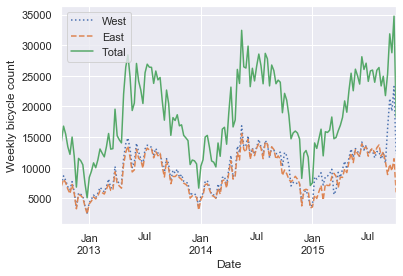

In [90]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--','-'])
plt.ylabel('Weekly bicycle count')

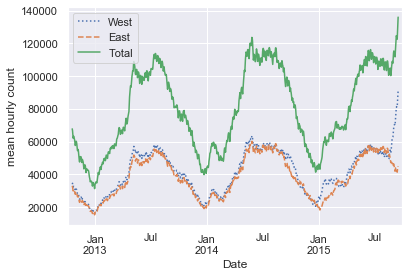

In [91]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

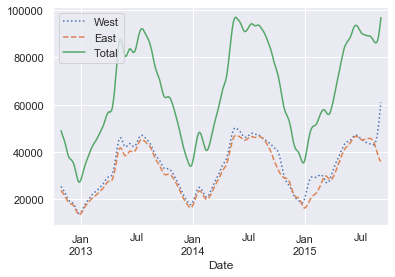

In [92]:
# The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

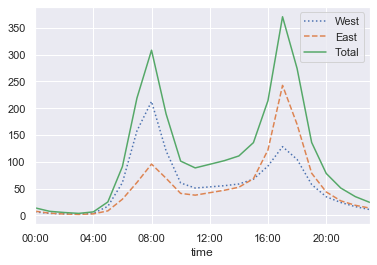

In [100]:
# average hourly bicycle count
by_time= data.groupby(data.index.time).mean()
hourly_tricks= 4*60*60*np.arange(6)
by_time.plot(xticks = hourly_tricks, style= [':', '--', '-'])

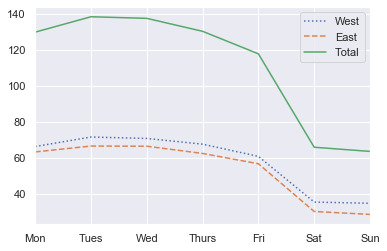

In [103]:
# average daily bicycle count
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [104]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

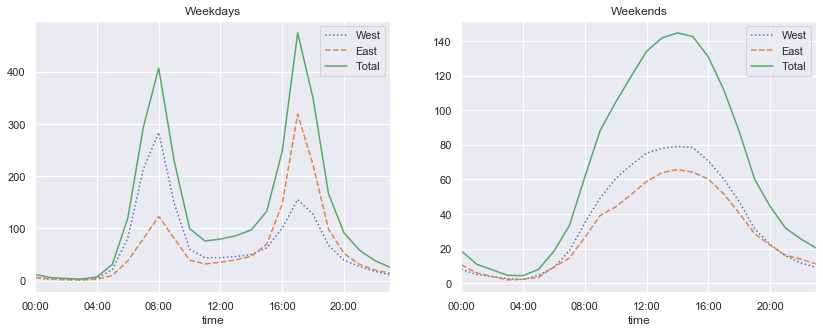

In [109]:
# Average hourly bicycle counts by weekday and weekend
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax= ax[0], title='Weekdays', xticks=hourly_ticks, style = [':', '--', '-'])
by_time.loc['Weekend'].plot(ax= ax[1], title='Weekends', xticks=hourly_ticks, style = [':', '--', '-'])

## High-Performance Pandas: eval() and query()

In [112]:
rng = np.random.RandomState(42)
x = rng.rand(1**6)
y = rng.rand(1**6)
%timeit x + y

663 ns ± 53.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [115]:
mask = (x>0.5) & (y<0.5)
mask

array([False])

In [116]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2
mask

array([False])

In [118]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.071979,0.439323,0.188588,0.586705,0.640611,0.662409,0.318503,0.600419,0.609742,0.390592,...,0.122887,0.491140,0.032855,0.567250,0.428673,0.421092,0.021024,0.398596,0.405897,0.869783
99996,0.313411,0.010490,0.469216,0.600825,0.451085,0.496918,0.983128,0.422056,0.719077,0.045588,...,0.072444,0.715574,0.300257,0.087290,0.130703,0.549202,0.287877,0.589258,0.516884,0.254370
99997,0.560873,0.647396,0.043068,0.282439,0.042950,0.346690,0.954034,0.603182,0.447768,0.888498,...,0.880079,0.508377,0.442052,0.621332,0.314942,0.131085,0.697310,0.111705,0.397560,0.988347
99998,0.710115,0.067999,0.611329,0.136199,0.054724,0.018160,0.911428,0.762005,0.245312,0.891027,...,0.249632,0.894231,0.342761,0.844330,0.659797,0.835561,0.117920,0.211202,0.931760,0.296913


In [119]:
%timeit df1 + df2 + df3 + df4

124 ms ± 4.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [120]:
%timeit pd.eval('df1 + df2 + df3 + df4')   # The eval() version of this expression is about 50% faster

55.6 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


In [122]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [123]:
df.eval('D = (A+B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,24.095868
1,0.330858,0.412879,0.441564,1.684325
2,0.689047,0.559068,0.230350,5.418335
3,0.290486,0.695479,0.852587,1.156439
4,0.424280,0.534344,0.245216,3.909296


In [124]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

### DataFrame.query() Method

In [127]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [128]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

## ------ Thank you --------